# Introduction

Linear regression generally have the form of $Y_{i} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ...$ <br>
There are several ways to find the coefficients of the regression: <br>
1. Linear Algebra: $\hat{\theta} = (X^{T}X)^{-1}X^{T}Y$ (When X is invertible) <br>
2. Gradient Descent: In this case, we need to write out the loss function and try to minimize the loss. <br>
$\hspace{30mm}$ $F(x)$ = Loss Function = MSE = $ \frac{1}{n}\sum^{n}_{i=1} (Y_{i} - \hat{Y_{i}})^{2}$ <br>

In this part of the assignment, we will be using the second way to implement this linear regression model. More details about the model's implementation can be found in corresponding lectures.

### <font color='red'>ATTENTION: THERE ARE A TOTAL OF 4 QUESTIONS THAT NEED YOUR ANSWERS</font>

## Import necessary packages

You'll be implement your model in `LinearRegression.py` which should be put under the same directory as the location of `Linear_Regression.ipynb`. Since we have enabled `autoreload`, you only need to import these packages once. You don't need to restart the kernel of this notebook nor rerun the next cell even if you change your implementation for `LinearRegression.py` in the meantime.

A suggestion for better productivity if you never used jupyter notebook + python script together: you can split your screen into left and right parts, and have your left part displaying this notebook and have your right part displaying your `LinearRegression.py`

In [1]:
# Please do not change this code block
%load_ext autoreload
%autoreload 2

# import numpy, pandas, pyplot for arrays, dataframes, and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn model to validate our custom model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Please make sure that your `LinearRegression.py` is under the same folder as this .ipynb notebook
from LinearRegression import Linear_Regression

# Experiment 1: Perfect Data

In this part, we generate a dataset with a perfect linear relationship to test our model's performance. Here, we use the equation: $y = 5x + 10$ to generate our dataset.

In [52]:
X = np.array([np.arange(1, 1000, 5)]).T
y = np.array((5 * X)).flatten() +  10
f'x = {X[:5].flatten()}, y = {y[:5]} for the first 5 values'

'x = [ 1  6 11 16 21], y = [ 15  40  65  90 115] for the first 5 values'

In [53]:
X.shape

(200, 1)

In [54]:
y.shape

(200,)

First, let's try to fit our model without any normalization (note: the below cell block could take significant amount of time to complete)

In [22]:
abs(np.array([1,2,-13]))

array([ 1,  2, 13])

In [27]:
np.arange(6).reshape((2,3))

array([[0, 1, 2],
       [3, 4, 5]])

In [28]:
sum(np.arange(6).reshape((2,3)))

array([3, 5, 7])

In [55]:
%%time
reg = Linear_Regression(num_iter = 10000000)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Adding intercept
Start Training
-----------------------
Iteration: 0
Coef: [[-0.77340549]
 [ 0.45597994]]
Loss: 4881253582673.155
-----------------------
Iteration: 1000000
Coef: [[5.00930062]
 [3.82240731]]
Loss: 9.583873295935135
-----------------------
Iteration: 2000000
Coef: [[5.00602476]
 [5.99788822]]
Loss: 4.022341794806757
-----------------------
Iteration: 3000000
Coef: [[5.00390342]
 [7.4072583 ]]
Loss: 1.6881834642697544
-----------------------
Iteration: 4000000
Coef: [[5.00252942]
 [8.32030959]]
Loss: 0.7085370168256329
-----------------------
Iteration: 5000000
Coef: [[5.00163866]
 [8.91182369]]
Loss: 0.2973732356186871
-----------------------
Iteration: 6000000
Coef: [[5.00106116]
 [9.29503196]]
Loss: 0.12480624845093792
-----------------------
Iteration: 7000000
Coef: [[5.00068766]
 [9.54329108]]
Loss: 0.052381676121182726
-----------------------
Iteration: 8000000
Coef: [[5.00044562]
 [9.70412408]]
Loss: 0.021984806316997587
-----------------------
Iteration: 9000000


Then, let's try to fit our model with min-max normalization

In [63]:
%%time
reg_norm = Linear_Regression(num_iter = 10000000, normalize=True)
reg_norm.fit(X,y)
print(f'\nNumber of total iterations: {len(reg_norm.loss)} \nBest Loss: {min(reg_norm.loss)}')

Normalizing...
self.min:  [[1.]]
self.max:  [[996.]]
self.X  (200, 1)
self.X  (200, 1)
Adding intercept
Start Training
-----------------------
Iteration: 0
Coef: [[2.75860646]
 [5.24715592]]
Loss: 8310356.289538595
-----------------------
End Training (Early Stopped at iteration 1280)

Number of total iterations: 2561 
Best Loss: 5.910019684170986e-26
CPU times: user 157 ms, sys: 26 µs, total: 157 ms
Wall time: 151 ms


Now, let's compare the performance between these two models with/without normalization

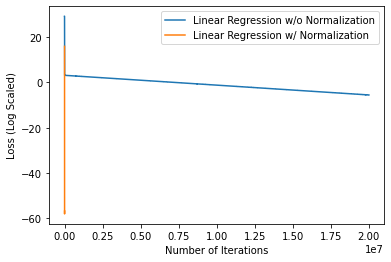

In [57]:
plt.plot(np.log(reg.loss), label='Linear Regression w/o Normalization')
plt.plot(np.log(reg_norm.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

<font color='red'>**Question 1: What conclusions can you draw from this experiment? Did normalization help? How and why?**
</font>

 - **Answer:**
 
 Normalization helped to reduce the number of iterations needed to converge. Without regularization, it took 20,000,000 iterations compared to 2,561 iterations with normalization. Both converged to practically zero, however the normalized version had a much lower loss and orders of magnitude less iterations than when normalization was not used.  Normalization helps the algorithm to converge quicker and be more stable. In case we have different features, it is helpful for having all features in the same scale [0-1]. As shown in the plots below, linear regression with normalization (second plot) converges quicker and in a stable manner compared to the first graph which is not using normalization. 

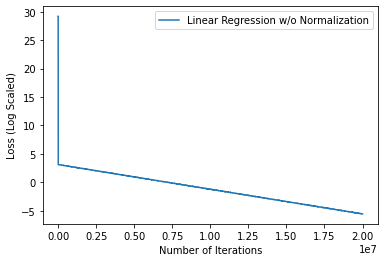

In [64]:
plt.plot(np.log(reg.loss), label='Linear Regression w/o Normalization')
#plt.plot(np.log(reg_norm.loss), label='Linear egression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

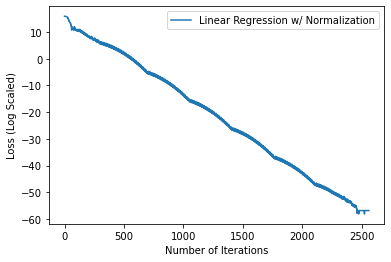

In [65]:
#plt.plot(np.log(reg.loss), label='Linear Regression w/o Normalization')
plt.plot(np.log(reg_norm.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

# Experiment 2: Real-World Data

After you complete the first experiment, let's see how our model performs against real-world data.

The below dataset is taken from the [Boston Housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), where there are 13 features and 1 target variable.

0. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS - proportion of non-retail business acres per town.
3. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. NOX - nitric oxides concentration (parts per 10 million)
5. RM - average number of rooms per dwelling
6. AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per \$10,000
10. PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - \% lower status of the population
13. MEDV (**TARGET VARIABLE y**) - Median value of owner-occupied homes in $1000's

In [66]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url, delimiter='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [67]:
X, y = np.array(df.drop(13, axis=1)), np.array(df[13])

In [68]:
X.min(axis = 0)

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

Now, let's use the data to fit our model

In [69]:
%%time
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Normalizing...
self.min:  [[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
  2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 3.2000e-01
  1.7300e+00]]
self.max:  [[ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
   24.     711.      22.     396.9     37.97  ]]
self.X  (506, 13)
self.X  (506, 13)
Adding intercept
Start Training
-----------------------
Iteration: 0
Coef: [[-0.15284644]
 [ 0.91954219]
 [ 0.12173847]
 [ 0.04756715]
 [ 0.39236864]
 [ 0.43235595]
 [-0.03951417]
 [-0.53828956]
 [-0.22451232]
 [ 0.05218221]
 [ 0.62290057]
 [ 0.83797614]
 [-0.28841193]
 [ 0.20451373]]
Loss: 522.7216092491382
-----------------------
End Training (Early Stopped at iteration 24016)

Number of total iterations: 48033 
Best Loss: 21.894831181730062
CPU times: user 6.62 s, sys: 40.1 ms, total: 6.66 s
Wall time: 6.65 s


Let's visualize the loss curve of our model on this dataset

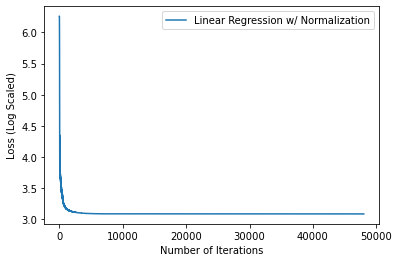

In [70]:
plt.plot(np.log(reg.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

To verify our model, we can compare our model's performance with respect to the linear regression model implemented in scikit-learn (a.k.a. `sklearn`). Scikit-learn is a popular machine learning library in python that provides many classical machine learning algorithms for many different tasks (regression, classification, clustering, etc). It also contains utility functions for preprocessing, calculating metrics, etc.

If you implemented your model correctly, you should get a very similar output (difference < 1e-3) for RMSE (Root Mean Squared Error) compared to sklearn linear regressor's RMSE.

In [72]:
m, n = df.shape
X_norm = X.copy()

# TODO: normalize X using the procedure in your model implementation
max_vec = np.zeros((1, X_norm.shape[1]))
min_vec = np.zeros((1, X_norm.shape[1]))
for i in range(X_norm.shape[1]):
    max_vec[:, i] = X_norm[:, i].max()
    min_vec[:, i] = X_norm[:, i].min()
X_norm = (X_norm - min_vec) / (max_vec - min_vec)

# Let's build a model with sklearn
lr = LinearRegression()
lr.fit(X_norm,y)

#Compare Root Mean Squared Error.
print(f"Our Model's RMSE: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nSklearn Model's RMSE: {(sum((lr.predict(X_norm) - y)**2)/m)**0.5}")

Our Model's RMSE: 4.679191295697374
Sklearn Model's RMSE: 4.679191295697282


Now, let's have some tweaks with our custom model. First, let's see if an interception (i.e. bias) really helps with our model's performance on the real-world data.

In [73]:
%%time
%%capture
reg_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=True)
reg_no_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=False)
reg_bias.fit(X,y)
reg_no_bias.fit(X,y)

CPU times: user 8.81 s, sys: 9.92 ms, total: 8.82 s
Wall time: 8.82 s


In [74]:
print(f"Our Model's RMSE with Interception: {(sum((reg_bias.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Interception: {(sum((reg_no_bias.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Interception: 4.679191295697372
Our Model's RMSE without Interception: 5.241354231005268


<font color='red'>**Question 2: What conclusions can you make here? Does the addition of an intercept make our model perform better?**</font>

* **Answer:** 

The addition of the intercept made our model perform better. The RMSE is higher when the model does not use the intercept. The error decreases when the model uses the intercept. This means that another dimension (bias term) helps the model to fit the data better. 




Second, let's see if regularization can further help with decreasing our model's loss. Since regularization deals with the problem of overfitting, we need to check our model's performance on the "unseen" data. Here, we will split our data into two parts: `training set` and `test set`, where our model will be fit with the training set, and the performance will be evaluated based on the test set.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
m, n = X_test.shape

In [86]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X_train, y_train)
# Feel free to tune the lambda hyperparameter for better performance when penalty (regularization) is applied
reg_l1 = Linear_Regression(num_iter=100000, normalize=True, penalty='l1')
reg_l1.fit(X_train, y_train)
reg_l2 = Linear_Regression(num_iter=100000, normalize=True, penalty='l2')
reg_l2.fit(X_train, y_train)

CPU times: user 5.78 s, sys: 30.2 ms, total: 5.81 s
Wall time: 5.76 s


In [87]:
print(f"Our Model's RMSE: {(sum((reg.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L1 Regularized Model's RMSE: {(sum((reg_l1.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L2 Regularized Model's RMSE: {(sum((reg_l2.predict(X_test).flatten() - y_test)**2)/m)**0.5}")

Our Model's RMSE: 4.552364543641716
Our L1 Regularized Model's RMSE: 4.552300256592042
Our L2 Regularized Model's RMSE: 4.6785362988450405


<font color='red'> **Question 3: What conclusions can you make here? Does the addition of a regularization make our model perform better on the test set? Why does the addition of it make our model perform better/worse?** </font>

* **Answer:**

Regularization did not help the model to perform better on the test set.

When we apply L1 regularization, our model performance on the test set is not changed very much, it keeps the same performance within 4 significant digits. If we check for 5 or more significant digits, it seems that the L1 regularization is improving the RMSE by a little which means that our model is generalizing better to the new, unseen data when using L1 regularization. The reason is because we are constraining our optimization function but it seems the model's complexity is not very high and therefore it may not be overfitting the data. 

When we apply L2 regularization, the RMSE increases which means that the new solution space gets even more restricted and cannot fit the data well. This will be helpful if our model is overfitting and we would like to generalized better on new data. However, in this exercise, the model does not seem to be overfitting which could be the explanation of why regularization is not helping to decrease the test error. 

My conclusions are that regularization does not always help to generalize the model better. It will be helpful when the training error is very close to zero which means that the model is complex enough to perfectly fit the data which is not the case for this exercise. 

Finally, let's see the role of an adaptive learning rate. Let's see our model's performance when adaptive learning rate is disabled.

In [88]:
m, n = X.shape

In [89]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X, y)
reg_alt = Linear_Regression(num_iter=100000, normalize=True, adaptive=False)
reg_alt.fit(X, y)

CPU times: user 31.2 s, sys: 2.01 s, total: 33.2 s
Wall time: 33.2 s


In [90]:
print(f"Our Model's RMSE with Adaptive LR: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Adaptive LR: {(sum((reg_alt.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Adaptive LR: 4.679191295697371
Our Model's RMSE without Adaptive LR: 4.7349200668028075


<font color='red'> **Question 4: What conclusions can you make here? Does the addition of an adaptive learning rate make our model perform better? What are your reasonings here?**</font>

* **Answer:**

The model performs better with adaptive learning. My reasoining behind this improvement is because adaptive learning could help the model to get to a better local optima. Without it, it seem to be stuck in a local optima which has a greater RMSE than the one found using adaptive learning. This could be done because when the loss is not improving, we don't update the coefficients and reduce the learning rate. When the loss is improving, we multiply by 1.3 the learning rate which can help the optimization process to find other local optimas. 